In [ ]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict, Literal,Annotated
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [5]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [6]:
llm = ChatOpenAI()

In [7]:
def chat_node(state: ChatState) :
    #take user query from the state
    messages = state['messages']
    #send to llm
    response = llm.invoke(messages)
    #response store state
    return {'messages' : [response]}

In [19]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)
graph.add_node('chat_node', chat_node)
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)
chatbot = graph.compile(checkpointer=checkpointer)

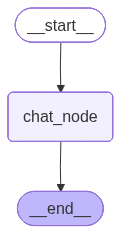

In [9]:
chatbot

In [12]:
initial_state = {
    "messages": [HumanMessage(content="Where i can see the northern lights?")]
}

In [13]:
chatbot.invoke(initial_state)['messages'][-1].content

"The northern lights, also known as the Aurora Borealis, can be seen in high-latitude regions closer to the Earth's magnetic poles. Some of the best places to see the northern lights include Norway, Sweden, Finland, Iceland, Canada, and Alaska. These locations have clear skies and are away from light pollution, making them ideal for observing this natural phenomenon. It is important to check the local weather and aurora forecast before planning a trip to see the northern lights."

In [21]:
thread_id = '1'
while True:
    user_message = input("Type here:")
    print('User:', user_message)
    
    if user_message.strip().lower() in ['exit','quit','bye']:
        break

    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages' : [HumanMessage(content=user_message)]}, config=config)
    print('Bot:', response['messages'][-1].content)

User: hi
Bot: Hello! How can I assist you today?
User: add 20 to 10
Bot: 20 + 10 = 30.
User: now add 90 to previous one
Bot: 30 + 90 = 120.
User: i am gauri mahadev
Bot: Hello Gauri Mahadev! How can I assist you today?
User: my friend is shan
Bot: Nice to meet you, Shan! If you have any questions or need assistance, feel free to ask.
User: whats my name
Bot: Your name is Gauri Mahadev.
User: whats my frends name
Bot: Your friend's name is Shan.
User: who is best
Bot: Both you and your friend are unique and special in your own ways, so it's not fair to compare who is "best". It's important to appreciate and support each other as friends.
User: whats the code for adding two no. in python
Bot: In Python, you can add two numbers by simply using the `+` operator. Here is an example code snippet:

```python
num1 = 20
num2 = 10

result = num1 + num2

print("The sum is:", result)
```

This code will add `num1` and `num2` together and print the result.
User: which university is best for doing m

In [22]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='bbbfd1ab-296d-471a-947d-b19b17e464f8'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-D92LFmtJGtBkebWS2ltfKItL2UIKu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c5a96-4c87-7502-8fd3-d3f6bef4b6f9-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details